In [13]:
import numpy as np
import pylab as py
import pandas as pd
import pylab
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs 
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [14]:
filename = "cars_clus.csv"
pdf = pd.read_csv(filename)
print("The shape of the dataset before cleaning: ",pdf.size)
pdf[['sales', 'resale', 'type', 'price', 'engine_s','horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg', 'lnsales']]=pdf[['sales', 'resale', 'type', 'price', 'engine_s','horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg', 'lnsales']].apply(pd.to_numeric,errors ='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop = True)
print("Shape after cleaning :",pdf.size)
pdf.head()

The shape of the dataset before cleaning:  2544
Shape after cleaning : 1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [15]:
featureset=pdf[[ 'engine_s','horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg']]
from sklearn.preprocessing import MinMaxScaler
X = featureset.values

In [16]:
min_max_scaler = MinMaxScaler()
featuremtx = min_max_scaler.fit_transform(X)
featuremtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [17]:
import scipy
leng =featuremtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng) :
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(featuremtx[i],featuremtx[j])

<ipython-input-17-fe76adc989e1>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


In [18]:
import pylab 
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D,'complete')
from scipy.cluster.hierarchy import fcluster
max_d =3
cluster = fcluster(Z,max_d,criterion = 'maxclust')
cluster

<ipython-input-18-e8b696d3af47>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D,'complete')


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1], dtype=int32)

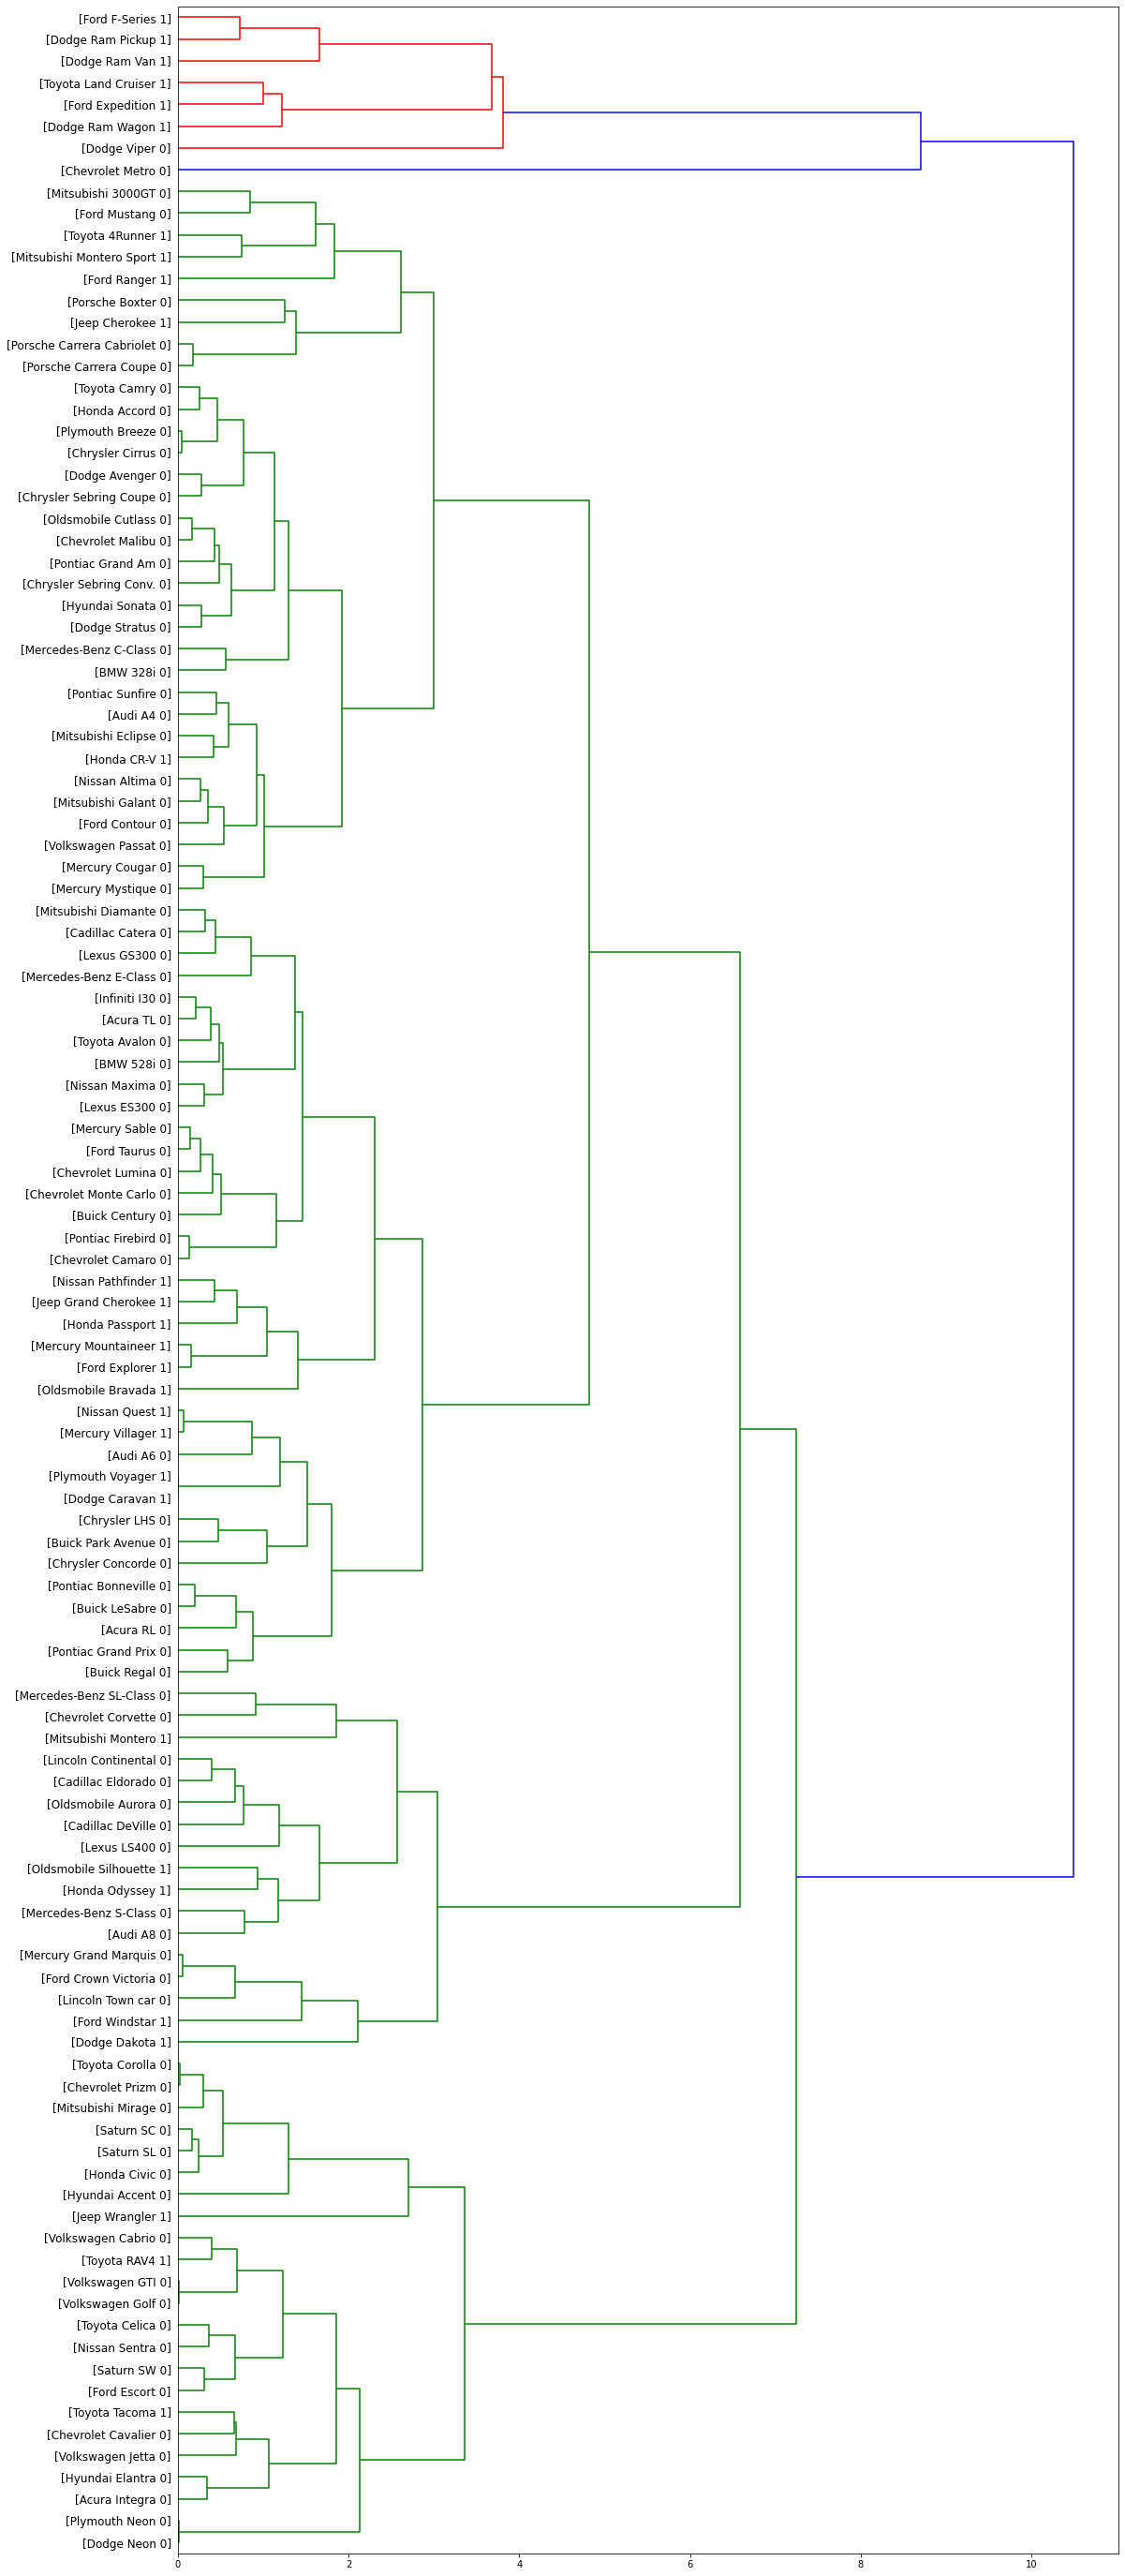

In [28]:
fig = pylab.figure(figsize =(18,50))
def llf(id):
    return'[%s %s %s]'%(pdf['manufact'][id],pdf['model'][id],int(float(pdf['type'][id])))
dendro =hierarchy.dendrogram(Z,leaf_label_func = llf, leaf_rotation =0,leaf_font_size =12,orientation ='right')

In [21]:
dist_matrix = distance_matrix(featuremtx,featuremtx)
print(dist_matrix)
agglom = AgglomerativeClustering(n_clusters = 4,linkage = 'complete')
agglom.fit(featuremtx)
agglom.fit(featuremtx)
agglom.labels_
pdf['cluster_']=agglom.labels_
pdf.head()

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,1
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,1
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,1


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

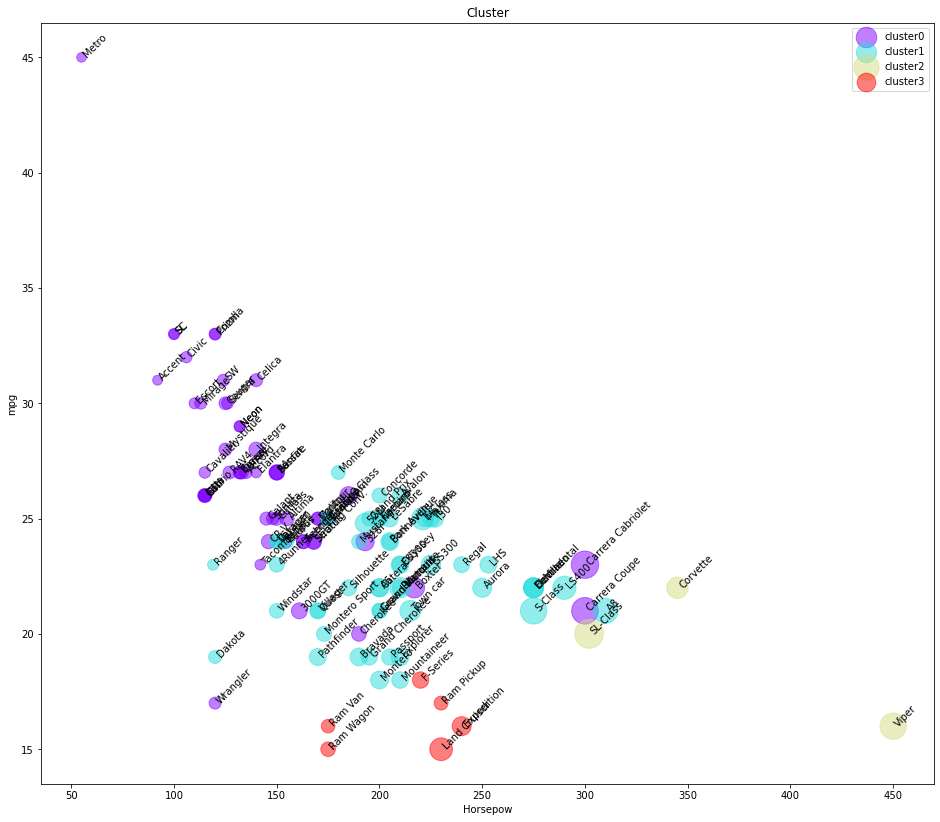

In [32]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_) + 1
colors = cm.rainbow(np.linspace(0,1,n_clusters))
cluster_labels = list(range(0, n_clusters))
plt.figure(figsize=(16,14))
for color,label in zip(colors,cluster_labels):
    subset = pdf[pdf.cluster_== label]
    for i in subset.index:
        plt.text(subset.horsepow[i],subset.mpg[i],str(subset['model'][i]),rotation = 45)
    plt.scatter(subset.horsepow,subset.mpg,s = subset.price*10,c = color,label = 'cluster'+str(label),alpha = 0.5)
plt.legend()
plt.title('Cluster')
plt.xlabel("Horsepow")
plt.ylabel('mpg')

In [36]:
pdf.groupby(['cluster_','type'])['cluster_'].count()
agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

<ipython-input-36-eca7b312ae81>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   144.625000  2.220833  27.395833  20.075479
         1.0   145.000000  2.580000  22.200000  17.009200
1        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   173.722222  3.238889  20.666667  24.422944
2        0.0   365.666667  6.233333  19.333333  66.010000
3        1.0   211.666667  4.483333  16.166667  29.024667

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

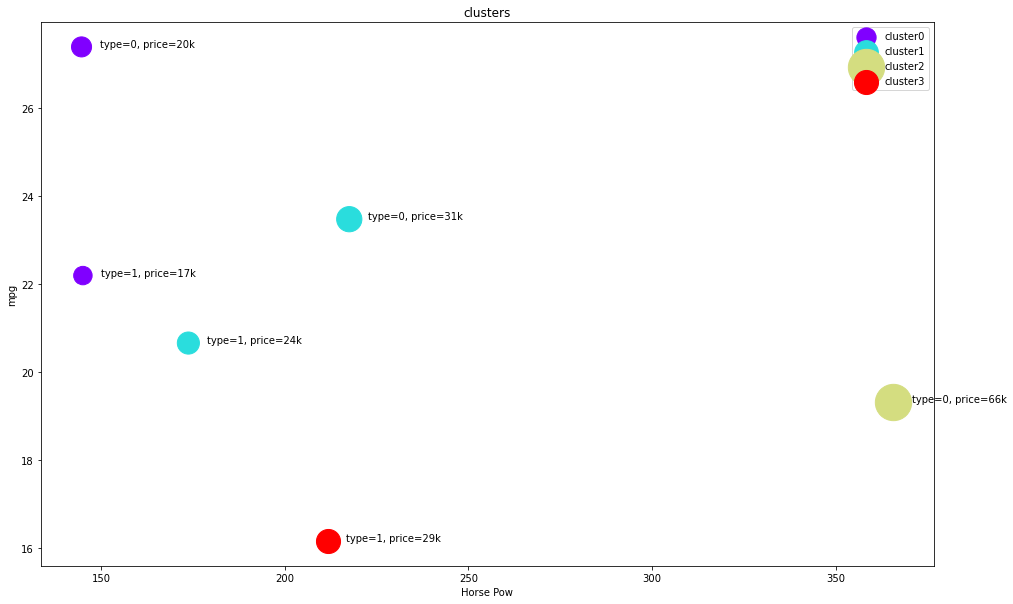

In [45]:
plt.figure(figsize = (16,10))
for color,label in zip(colors,cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow,subset.mpg,s = subset.price*20,c = color, label = 'cluster'+str(label))
plt.legend()
plt.title("clusters")
plt.xlabel('Horse Pow')
plt.ylabel('mpg')